In [1]:
import geopandas as gpd
import pandas as pd
from sklearn.cluster import DBSCAN
from shapely.ops import unary_union
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
# import libpysal

In [2]:
from shapely import wkt

block_groups = pd.read_csv("data/Census_Block_Groups_2020_20240131.csv", dtype={'GEOID': str})
block_groups['geometry'] = block_groups['the_geom'].apply(wkt.loads)
block_groups.drop(columns=['the_geom'], inplace=True)
block_groups = gpd.GeoDataFrame(block_groups, crs='EPSG:4326')
block_groups

,OBJECTID,GEOID,CTBLOCKGROUP,CT,BLOCKGROUP,Shape_Length,Shape_Area,geometry
0,1807,060730200191,200191,20019,1,19520.779251,1.281500e+07,"MULTIPOLYGON (((-117.20764 33.14182, -117.2077..."
1,1676,060730189034,189034,18903,4,10026.669194,5.460566e+06,"MULTIPOLYGON (((-117.25339 33.39086, -117.2527..."
2,878,060730108001,108001,10800,1,8502.270733,3.821664e+06,"MULTIPOLYGON (((-117.17970 32.68618, -117.1798..."
3,1009,060730133211,133211,13321,1,8139.283833,3.846955e+06,"MULTIPOLYGON (((-116.95831 32.62129, -116.9582..."
4,1061,060730134232,134232,13423,2,69292.332370,1.599042e+08,"MULTIPOLYGON (((-116.96373 32.70351, -116.9636..."
...,...,...,...,...,...,...,...,...
2052,1770,060730198031,198031,19803,1,29357.559885,1.915028e+07,"MULTIPOLYGON (((-117.29525 33.17992, -117.2946..."
2053,28,060730008002,8002,800,2,5298.407410,1.534904e+06,"MULTIPOLYGON (((-117.13792 32.74383, -117.1379..."
2054,1677,060730189041,189041,18904,1,7466.510835,3.467576e+06,"MULTIPOLYGON (((-117.25363 33.37684, -117.2536..."
2055,1628,060730186012,186012,18601,2,15011.933296,9.543736e+06,"MULTIPOLYGON (((-117.34560 33.23710, -117.3448..."


In [3]:
df = gpd.read_file('data/BUSINESS_SITES.shp')
df = df[df['POINT_X'] >= 10]
df = df.to_crs(block_groups.crs)
df

,APN,BCCCODE,OWNNAM1,OWNNAM2,OWNNAM3,CAREOF,STRNUM,STRFRA,STRDIR,STRNAM,STRTYP,STRSRM,CITY,STATE,CONTRY,ZIPCD1,ZIPCD2,LOCCOD,LOCNUM,LOCFRA,LOCDIR,LOCNAM,LOCTYP,LOCSRM,LOCCIT,BUSTYPE,SITE_ADDRE,POINT_X,POINT_Y,geometry
0,1.010101e+09,131.0,PACIFIC MARINE CREDIT UNION,None,None,ATTN ACCOUNTING DEPT,1278.0,None,None,ROCKY POINT,DR,None,OCEANSIDE,CA,None,92056.0,0.0,None,525111.0,None,None,BASILONE,RD,000501,CAMP PENDLETON,CREDIT UNION EXEMPT,525111 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132)
1,1.010101e+09,291.0,HRB TAX GROUP INC,H&R BLOCK #6438,None,ATTN BUSINESS PP TAX #6438,1.0,None,None,H&R BLOCK,WAY,None,KANSAS CITY,MO,None,64105.0,0.0,None,0.0,None,None,CAMP PENDLETON,None,None,OCEANSIDE,ACCOUNTANT,0 CAMP PENDLETON,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132)
2,1.010101e+09,314.0,NORTH COUNTY PIZZA INC,DBA DOMINOS PIZZA #8357,None,None,0.0,None,None,PO BOX 4489,None,None,OCEANSIDE,CA,None,92052.0,0.0,None,520407.0,None,None,BASILONE,RD,None,CAMP PENDLETON,CAFE-FAST FOOD,520407 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132)
3,1.010101e+09,314.0,PIAZZA MANAGEMENT CORPORATION,OF SAN DIEGO,PIAZZA FAMILY RESTAURANTS INC,DBA MCDONALDS #34729,23113.0,None,None,PLAZA POINTE,DR,#100,LAGUNA HILLS,CA,None,92653.0,0.0,None,430314.0,None,None,BROWN,ST,None,CAMP PENDLETON,CAFE-FAST FOOD,430314 BROWN ST,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132)
4,1.010101e+09,404.0,BRIDGESTONE RETAIL,OPERATIONS LLC,DBA FIRESTONE COMPLT AUTO CARE,ATTN TAX DEPT,200.0,None,S,4TH,AVE,#100,NASHVILLE,TN,None,37201.0,0.0,None,51091.0,None,None,BASILONE,RD,None,CAMP PENDLETON,TIRES&GENERAL MERCH,51091 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98158,0.000000e+00,261.0,XTRA INC,OFFICE EQUIP&FURN SEE APT HSE,#472-440-02-00,None,0.0,None,None,None,None,None,None,None,None,0.0,0.0,None,5802.0,None,None,UNIVERSITY,AVE,None,SAN DIEGO,APARTMENTS,5802 UNIVERSITY AVE,6.308874e+06,1.853500e+06,POINT (-117.07218 32.74956)
98159,0.000000e+00,264.0,HONEYCOMB BUSINESS,(A CALIF CORP),DBA LA PETITE ROUGE,None,6840.0,None,None,EL CAJON,BLVD,None,SAN DIEGO,CA,None,92115.0,0.0,None,6844.0,None,None,EL CAJON,BLVD,None,SAN DIEGO,MOTEL FURNISHINGS,6844 EL CAJON BLVD,6.315622e+06,1.860472e+06,POINT (-117.05041 32.76886)
98160,0.000000e+00,298.0,ADVANCED LOGISTICS TECH INC,EQUIPMENT LOCATED AT NAVAL,COMM CONTROL & OCEAN SURV CTR,None,7968.0,None,None,ARJONS,DR,#101,SAN DIEGO,CA,None,92126.0,0.0,None,271.0,None,None,CATALINA,BLVD,None,SAN DIEGO,MISC PROFESSIONAL,271 CATALINA BLVD,6.254424e+06,1.839227e+06,POINT (-117.24882 32.70902)
98161,0.000000e+00,298.0,AT&T,EQUIPMENT LOCATED AT NAVAL,COMM CONTROL & OCEAN SURV CTR,None,3940.0,None,None,7TH,AVE,None,SAN DIEGO,CA,None,92103.0,0.0,None,271.0,None,None,CATALINA,BLVD,None,SAN DIEGO,MISC PROFESSIONAL,271 CATALINA BLVD,6.254424e+06,1.839227e+06,POINT (-117.24882 32.70902)


#### Plotting Initial Sites & Geographies

<Axes: >

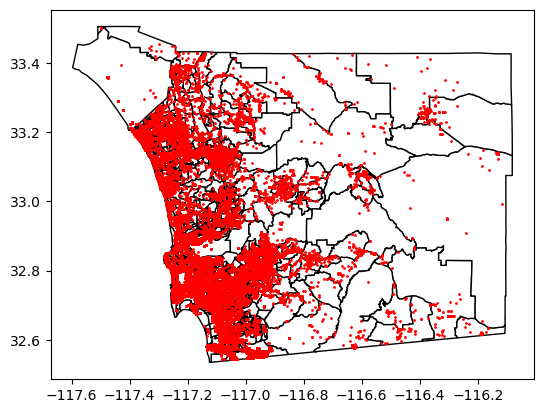

In [4]:
base = block_groups.plot(color='white', edgecolor='black')

df.plot(ax=base, marker='o', color='red', markersize=1)

In [5]:
# Join the nearest block_groups to each business
joined_blocks = df.sjoin_nearest(block_groups)
joined_blocks

/Users/kelvinnguyen/anaconda3/envs/gpd/lib/python3.11/site-packages/geopandas/array.py:365: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


,APN,BCCCODE,OWNNAM1,OWNNAM2,OWNNAM3,CAREOF,STRNUM,STRFRA,STRDIR,STRNAM,STRTYP,STRSRM,CITY,STATE,CONTRY,ZIPCD1,ZIPCD2,LOCCOD,LOCNUM,LOCFRA,LOCDIR,LOCNAM,LOCTYP,LOCSRM,LOCCIT,BUSTYPE,SITE_ADDRE,POINT_X,POINT_Y,geometry,index_right,OBJECTID,GEOID,CTBLOCKGROUP,CT,BLOCKGROUP,Shape_Length,Shape_Area
0,1.010101e+09,131.0,PACIFIC MARINE CREDIT UNION,None,None,ATTN ACCOUNTING DEPT,1278.0,None,None,ROCKY POINT,DR,None,OCEANSIDE,CA,None,92056.0,0.0,None,525111.0,None,None,BASILONE,RD,000501,CAMP PENDLETON,CREDIT UNION EXEMPT,525111 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),1141,1688,060730190011,190011,19001,1,251536.838631,1.312856e+09
1,1.010101e+09,291.0,HRB TAX GROUP INC,H&R BLOCK #6438,None,ATTN BUSINESS PP TAX #6438,1.0,None,None,H&R BLOCK,WAY,None,KANSAS CITY,MO,None,64105.0,0.0,None,0.0,None,None,CAMP PENDLETON,None,None,OCEANSIDE,ACCOUNTANT,0 CAMP PENDLETON,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),1141,1688,060730190011,190011,19001,1,251536.838631,1.312856e+09
2,1.010101e+09,314.0,NORTH COUNTY PIZZA INC,DBA DOMINOS PIZZA #8357,None,None,0.0,None,None,PO BOX 4489,None,None,OCEANSIDE,CA,None,92052.0,0.0,None,520407.0,None,None,BASILONE,RD,None,CAMP PENDLETON,CAFE-FAST FOOD,520407 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),1141,1688,060730190011,190011,19001,1,251536.838631,1.312856e+09
3,1.010101e+09,314.0,PIAZZA MANAGEMENT CORPORATION,OF SAN DIEGO,PIAZZA FAMILY RESTAURANTS INC,DBA MCDONALDS #34729,23113.0,None,None,PLAZA POINTE,DR,#100,LAGUNA HILLS,CA,None,92653.0,0.0,None,430314.0,None,None,BROWN,ST,None,CAMP PENDLETON,CAFE-FAST FOOD,430314 BROWN ST,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),1141,1688,060730190011,190011,19001,1,251536.838631,1.312856e+09
4,1.010101e+09,404.0,BRIDGESTONE RETAIL,OPERATIONS LLC,DBA FIRESTONE COMPLT AUTO CARE,ATTN TAX DEPT,200.0,None,S,4TH,AVE,#100,NASHVILLE,TN,None,37201.0,0.0,None,51091.0,None,None,BASILONE,RD,None,CAMP PENDLETON,TIRES&GENERAL MERCH,51091 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),1141,1688,060730190011,190011,19001,1,251536.838631,1.312856e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95648,7.600511e+09,298.0,TOWNE PARK LLC,None,None,None,555.0,None,E,NORTH,LN,#5020,CONSHOHOCKEN,PA,None,19428.0,0.0,None,4000.0,None,None,CORONADO BAY,RD,None,CORONADO,MISC PROFESSIONAL,4000 CORONADO BAY RD,6.289835e+06,1.810825e+06,POINT (-117.13292 32.63184),720,876,060730106011,106011,10601,1,40259.552232,7.997295e+06
95649,7.600511e+09,305.0,ON COMMAND VIDEO CORP,(LOEWS CORONADO),SEE 3022910000,None,0.0,None,None,None,None,None,None,None,None,0.0,0.0,None,4000.0,None,None,CORONADO BAY,RD,None,CORONADO,ELECTRONIC RECORDING,4000 CORONADO BAY RD,6.289835e+06,1.810825e+06,POINT (-117.13292 32.63184),720,876,060730106011,106011,10601,1,40259.552232,7.997295e+06
95650,7.600511e+09,41.0,CORONADO CAYS YACHT CLUB,None,None,None,30.0,None,N,CARIBE CAY,BLVD,None,CORONADO,CA,None,92118.0,0.0,None,30.0,None,N,CARIBE CAY,BLVD,None,CORONADO,CLUBS - SOCIAL/SERVI,30 N CARIBE CAY BLVD,6.290574e+06,1.809162e+06,POINT (-117.13048 32.62729),720,876,060730106011,106011,10601,1,40259.552232,7.997295e+06
95659,7.600560e+09,528.0,BRIAN SMOCK GOLF LLC,DBA BRIAN SMOCK GOLF,None,None,2000.0,None,None,VISALIA,ROW,None,CORONADO,CA,None,92118.0,0.0,None,2000.0,None,None,VISALIA,ROW,None,CORONADO,SPECIALTY STORE-SOFT,2000 VISALIA ROW,6.279315e+06,1.830181e+06,POINT (-117.16765 32.68479),1820,880,060730109001,109001,10900,1,14964.745417,1.002034e+07


#### Creating New Shapes from K-Means clustering

In [6]:
# Cluster points together initially to get an idea of clusters, then use those clusters to create new shapes?

# kmeans using x, y values of businesses -> getting cluster labels -> finding nearest ctblock for those new labels, then dissolve

# Might just be better to use their k-means ++ rather than finding where things are based on the shape

from sklearn.cluster import KMeans

new_centers = block_groups.loc[block_groups['CTBLOCKGROUP'].isin(joined_blocks['CTBLOCKGROUP'].value_counts()
                                                                    .iloc[:70].index)].geometry.centroid

points = pd.DataFrame([joined_blocks['geometry'].x, joined_blocks['geometry'].y]).T.rename(columns={0: 'point_x', 1: 'point_y'})

# Assume 'data' is your DataFrame and 'geometry' is your geometry column
kmeans = KMeans(n_clusters=70)
kmeans.fit(points)

joined_blocks['cluster'] = kmeans.labels_

joined_blocks
# Get centers from clusters and use them as the centers to generate cluser

/var/folders/yx/7kn925_914qd3z72tqy9rlk80000gn/T/ipykernel_1123/2397274552.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  .iloc[:70].index)].geometry.centroid
/Users/kelvinnguyen/anaconda3/envs/gpd/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,APN,BCCCODE,OWNNAM1,OWNNAM2,OWNNAM3,CAREOF,STRNUM,STRFRA,STRDIR,STRNAM,STRTYP,STRSRM,CITY,STATE,CONTRY,ZIPCD1,ZIPCD2,LOCCOD,LOCNUM,LOCFRA,LOCDIR,LOCNAM,LOCTYP,LOCSRM,LOCCIT,BUSTYPE,SITE_ADDRE,POINT_X,POINT_Y,geometry,index_right,OBJECTID,GEOID,CTBLOCKGROUP,CT,BLOCKGROUP,Shape_Length,Shape_Area,cluster
0,1.010101e+09,131.0,PACIFIC MARINE CREDIT UNION,None,None,ATTN ACCOUNTING DEPT,1278.0,None,None,ROCKY POINT,DR,None,OCEANSIDE,CA,None,92056.0,0.0,None,525111.0,None,None,BASILONE,RD,000501,CAMP PENDLETON,CREDIT UNION EXEMPT,525111 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),1141,1688,060730190011,190011,19001,1,251536.838631,1.312856e+09,66
1,1.010101e+09,291.0,HRB TAX GROUP INC,H&R BLOCK #6438,None,ATTN BUSINESS PP TAX #6438,1.0,None,None,H&R BLOCK,WAY,None,KANSAS CITY,MO,None,64105.0,0.0,None,0.0,None,None,CAMP PENDLETON,None,None,OCEANSIDE,ACCOUNTANT,0 CAMP PENDLETON,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),1141,1688,060730190011,190011,19001,1,251536.838631,1.312856e+09,66
2,1.010101e+09,314.0,NORTH COUNTY PIZZA INC,DBA DOMINOS PIZZA #8357,None,None,0.0,None,None,PO BOX 4489,None,None,OCEANSIDE,CA,None,92052.0,0.0,None,520407.0,None,None,BASILONE,RD,None,CAMP PENDLETON,CAFE-FAST FOOD,520407 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),1141,1688,060730190011,190011,19001,1,251536.838631,1.312856e+09,66
3,1.010101e+09,314.0,PIAZZA MANAGEMENT CORPORATION,OF SAN DIEGO,PIAZZA FAMILY RESTAURANTS INC,DBA MCDONALDS #34729,23113.0,None,None,PLAZA POINTE,DR,#100,LAGUNA HILLS,CA,None,92653.0,0.0,None,430314.0,None,None,BROWN,ST,None,CAMP PENDLETON,CAFE-FAST FOOD,430314 BROWN ST,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),1141,1688,060730190011,190011,19001,1,251536.838631,1.312856e+09,66
4,1.010101e+09,404.0,BRIDGESTONE RETAIL,OPERATIONS LLC,DBA FIRESTONE COMPLT AUTO CARE,ATTN TAX DEPT,200.0,None,S,4TH,AVE,#100,NASHVILLE,TN,None,37201.0,0.0,None,51091.0,None,None,BASILONE,RD,None,CAMP PENDLETON,TIRES&GENERAL MERCH,51091 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),1141,1688,060730190011,190011,19001,1,251536.838631,1.312856e+09,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95648,7.600511e+09,298.0,TOWNE PARK LLC,None,None,None,555.0,None,E,NORTH,LN,#5020,CONSHOHOCKEN,PA,None,19428.0,0.0,None,4000.0,None,None,CORONADO BAY,RD,None,CORONADO,MISC PROFESSIONAL,4000 CORONADO BAY RD,6.289835e+06,1.810825e+06,POINT (-117.13292 32.63184),720,876,060730106011,106011,10601,1,40259.552232,7.997295e+06,62
95649,7.600511e+09,305.0,ON COMMAND VIDEO CORP,(LOEWS CORONADO),SEE 3022910000,None,0.0,None,None,None,None,None,None,None,None,0.0,0.0,None,4000.0,None,None,CORONADO BAY,RD,None,CORONADO,ELECTRONIC RECORDING,4000 CORONADO BAY RD,6.289835e+06,1.810825e+06,POINT (-117.13292 32.63184),720,876,060730106011,106011,10601,1,40259.552232,7.997295e+06,62
95650,7.600511e+09,41.0,CORONADO CAYS YACHT CLUB,None,None,None,30.0,None,N,CARIBE CAY,BLVD,None,CORONADO,CA,None,92118.0,0.0,None,30.0,None,N,CARIBE CAY,BLVD,None,CORONADO,CLUBS - SOCIAL/SERVI,30 N CARIBE CAY BLVD,6.290574e+06,1.809162e+06,POINT (-117.13048 32.62729),720,876,060730106011,106011,10601,1,40259.552232,7.997295e+06,62
95659,7.600560e+09,528.0,BRIAN SMOCK GOLF LLC,DBA BRIAN SMOCK GOLF,None,None,2000.0,None,None,VISALIA,ROW,None,CORONADO,CA,None,92118.0,0.0,None,2000.0,None,None,VISALIA,ROW,None,CORONADO,SPECIALTY STORE-SOFT,2000 VISALIA ROW,6.279315e+06,1.830181e+06,POINT (-117.16765 32.68479),1820,880,060730109001,109001,10900,1,14964.745417,1.002034e+07,43


<Axes: >

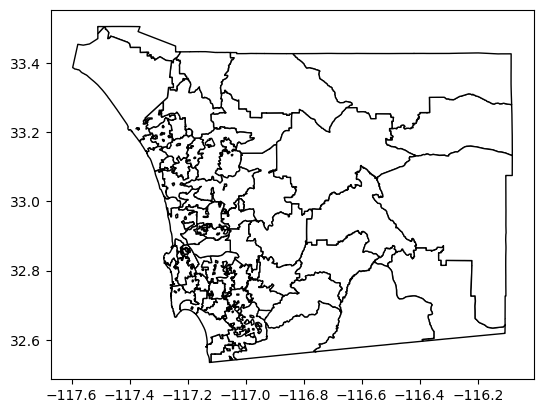

In [7]:
test1 = joined_blocks.groupby(['CTBLOCKGROUP', 'cluster'])['GEOID'].max().reset_index()
new_dict = test1.set_index('CTBLOCKGROUP')['cluster'].to_dict()

block_groups['test'] = block_groups['CTBLOCKGROUP'].map(new_dict)

new_blocks = block_groups.dissolve(by='test').reset_index()
new_blocks.plot(color='white', edgecolor='black')

In [8]:
### Trying with k-means, centers outward

df['APN']

0        1.010101e+09
1        1.010101e+09
2        1.010101e+09
3        1.010101e+09
4        1.010101e+09
             ...     
98158    0.000000e+00
98159    0.000000e+00
98160    0.000000e+00
98161    0.000000e+00
98162    0.000000e+00
Name: APN, Length: 98162, dtype: float64

In [9]:
from sklearn.cluster import KMeans

centroids = block_groups[block_groups['CTBLOCKGROUP'].isin(joined_blocks['CTBLOCKGROUP'].value_counts().iloc[:70].index)]['geometry'].centroid

# Assume 'data' is your DataFrame and 'geometry' is your geometry column
kmeans = KMeans(n_clusters=70)
kmeans.cluster_centers_ = list(zip(centroids.x, centroids.y))
kmeans.fit(points)

joined_blocks['cluster'] = kmeans.labels_

joined_blocks


/var/folders/yx/7kn925_914qd3z72tqy9rlk80000gn/T/ipykernel_1123/3469206652.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = block_groups[block_groups['CTBLOCKGROUP'].isin(joined_blocks['CTBLOCKGROUP'].value_counts().iloc[:70].index)]['geometry'].centroid
/Users/kelvinnguyen/anaconda3/envs/gpd/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,APN,BCCCODE,OWNNAM1,OWNNAM2,OWNNAM3,CAREOF,STRNUM,STRFRA,STRDIR,STRNAM,STRTYP,STRSRM,CITY,STATE,CONTRY,ZIPCD1,ZIPCD2,LOCCOD,LOCNUM,LOCFRA,LOCDIR,LOCNAM,LOCTYP,LOCSRM,LOCCIT,BUSTYPE,SITE_ADDRE,POINT_X,POINT_Y,geometry,index_right,OBJECTID,GEOID,CTBLOCKGROUP,CT,BLOCKGROUP,Shape_Length,Shape_Area,cluster
0,1.010101e+09,131.0,PACIFIC MARINE CREDIT UNION,None,None,ATTN ACCOUNTING DEPT,1278.0,None,None,ROCKY POINT,DR,None,OCEANSIDE,CA,None,92056.0,0.0,None,525111.0,None,None,BASILONE,RD,000501,CAMP PENDLETON,CREDIT UNION EXEMPT,525111 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),1141,1688,060730190011,190011,19001,1,251536.838631,1.312856e+09,59
1,1.010101e+09,291.0,HRB TAX GROUP INC,H&R BLOCK #6438,None,ATTN BUSINESS PP TAX #6438,1.0,None,None,H&R BLOCK,WAY,None,KANSAS CITY,MO,None,64105.0,0.0,None,0.0,None,None,CAMP PENDLETON,None,None,OCEANSIDE,ACCOUNTANT,0 CAMP PENDLETON,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),1141,1688,060730190011,190011,19001,1,251536.838631,1.312856e+09,59
2,1.010101e+09,314.0,NORTH COUNTY PIZZA INC,DBA DOMINOS PIZZA #8357,None,None,0.0,None,None,PO BOX 4489,None,None,OCEANSIDE,CA,None,92052.0,0.0,None,520407.0,None,None,BASILONE,RD,None,CAMP PENDLETON,CAFE-FAST FOOD,520407 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),1141,1688,060730190011,190011,19001,1,251536.838631,1.312856e+09,59
3,1.010101e+09,314.0,PIAZZA MANAGEMENT CORPORATION,OF SAN DIEGO,PIAZZA FAMILY RESTAURANTS INC,DBA MCDONALDS #34729,23113.0,None,None,PLAZA POINTE,DR,#100,LAGUNA HILLS,CA,None,92653.0,0.0,None,430314.0,None,None,BROWN,ST,None,CAMP PENDLETON,CAFE-FAST FOOD,430314 BROWN ST,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),1141,1688,060730190011,190011,19001,1,251536.838631,1.312856e+09,59
4,1.010101e+09,404.0,BRIDGESTONE RETAIL,OPERATIONS LLC,DBA FIRESTONE COMPLT AUTO CARE,ATTN TAX DEPT,200.0,None,S,4TH,AVE,#100,NASHVILLE,TN,None,37201.0,0.0,None,51091.0,None,None,BASILONE,RD,None,CAMP PENDLETON,TIRES&GENERAL MERCH,51091 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),1141,1688,060730190011,190011,19001,1,251536.838631,1.312856e+09,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95648,7.600511e+09,298.0,TOWNE PARK LLC,None,None,None,555.0,None,E,NORTH,LN,#5020,CONSHOHOCKEN,PA,None,19428.0,0.0,None,4000.0,None,None,CORONADO BAY,RD,None,CORONADO,MISC PROFESSIONAL,4000 CORONADO BAY RD,6.289835e+06,1.810825e+06,POINT (-117.13292 32.63184),720,876,060730106011,106011,10601,1,40259.552232,7.997295e+06,48
95649,7.600511e+09,305.0,ON COMMAND VIDEO CORP,(LOEWS CORONADO),SEE 3022910000,None,0.0,None,None,None,None,None,None,None,None,0.0,0.0,None,4000.0,None,None,CORONADO BAY,RD,None,CORONADO,ELECTRONIC RECORDING,4000 CORONADO BAY RD,6.289835e+06,1.810825e+06,POINT (-117.13292 32.63184),720,876,060730106011,106011,10601,1,40259.552232,7.997295e+06,48
95650,7.600511e+09,41.0,CORONADO CAYS YACHT CLUB,None,None,None,30.0,None,N,CARIBE CAY,BLVD,None,CORONADO,CA,None,92118.0,0.0,None,30.0,None,N,CARIBE CAY,BLVD,None,CORONADO,CLUBS - SOCIAL/SERVI,30 N CARIBE CAY BLVD,6.290574e+06,1.809162e+06,POINT (-117.13048 32.62729),720,876,060730106011,106011,10601,1,40259.552232,7.997295e+06,48
95659,7.600560e+09,528.0,BRIAN SMOCK GOLF LLC,DBA BRIAN SMOCK GOLF,None,None,2000.0,None,None,VISALIA,ROW,None,CORONADO,CA,None,92118.0,0.0,None,2000.0,None,None,VISALIA,ROW,None,CORONADO,SPECIALTY STORE-SOFT,2000 VISALIA ROW,6.279315e+06,1.830181e+06,POINT (-117.16765 32.68479),1820,880,060730109001,109001,10900,1,14964.745417,1.002034e+07,32


<Axes: >

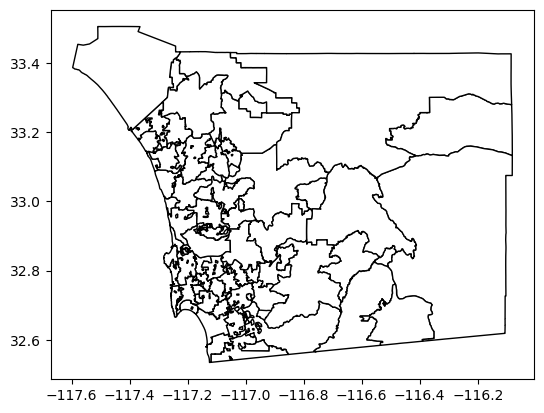

In [10]:
test1 = joined_blocks.groupby(['CTBLOCKGROUP', 'cluster'])['GEOID'].max().reset_index()
new_dict = test1.set_index('CTBLOCKGROUP')['cluster'].to_dict()

block_groups['test'] = block_groups['CTBLOCKGROUP'].map(new_dict)

new_blocks = block_groups.dissolve(by='test').reset_index()
new_blocks.plot(color='white', edgecolor='black')

### Merging with Census Tract

In [11]:
## Try out Census Tract

tracts = pd.read_csv("data/Census_Tracts_2020_20240226.csv")
tracts['geometry'] = tracts['the_geom'].apply(wkt.loads)
tracts.drop(columns=['the_geom'], inplace=True)
tracts = gpd.GeoDataFrame(tracts, crs='EPSG:4326')
tracts

,OBJECTID,GEOID,CT,Shape_Length,Shape_Area,geometry
0,343,6073013315,13315,14731.300118,1.361873e+07,"MULTIPOLYGON (((-116.95513 32.64096, -116.9551..."
1,116,6073005500,5500,9038.712264,4.740261e+06,"MULTIPOLYGON (((-117.14639 32.72793, -117.1460..."
2,568,6073018517,18517,19968.703453,2.089468e+07,"MULTIPOLYGON (((-117.29359 33.19467, -117.2936..."
3,710,6073020813,20813,54680.988261,1.417909e+08,"MULTIPOLYGON (((-116.85075 33.05116, -116.8500..."
4,176,6073008339,8339,69458.557531,1.276369e+08,"MULTIPOLYGON (((-117.24555 32.93049, -117.2453..."
...,...,...,...,...,...,...
731,615,6073019303,19303,52571.063397,9.102588e+07,"MULTIPOLYGON (((-117.23317 33.25363, -117.2329..."
732,563,6073018510,18510,28092.429217,2.149973e+07,"MULTIPOLYGON (((-117.33332 33.21199, -117.3333..."
733,316,6073012302,12302,9265.775478,4.386708e+06,"MULTIPOLYGON (((-117.08225 32.63681, -117.0826..."
734,248,6073009308,9308,17602.726290,9.999563e+06,"MULTIPOLYGON (((-117.14104 32.77529, -117.1406..."


In [12]:
joined_tracts = df.sjoin_nearest(tracts)
joined_tracts

/Users/kelvinnguyen/anaconda3/envs/gpd/lib/python3.11/site-packages/geopandas/array.py:365: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


,APN,BCCCODE,OWNNAM1,OWNNAM2,OWNNAM3,CAREOF,STRNUM,STRFRA,STRDIR,STRNAM,STRTYP,STRSRM,CITY,STATE,CONTRY,ZIPCD1,ZIPCD2,LOCCOD,LOCNUM,LOCFRA,LOCDIR,LOCNAM,LOCTYP,LOCSRM,LOCCIT,BUSTYPE,SITE_ADDRE,POINT_X,POINT_Y,geometry,index_right,OBJECTID,GEOID,CT,Shape_Length,Shape_Area
0,1.010101e+09,131.0,PACIFIC MARINE CREDIT UNION,None,None,ATTN ACCOUNTING DEPT,1278.0,None,None,ROCKY POINT,DR,None,OCEANSIDE,CA,None,92056.0,0.0,None,525111.0,None,None,BASILONE,RD,000501,CAMP PENDLETON,CREDIT UNION EXEMPT,525111 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),54,599,6073019001,19001,333552.770299,1.779488e+09
1,1.010101e+09,291.0,HRB TAX GROUP INC,H&R BLOCK #6438,None,ATTN BUSINESS PP TAX #6438,1.0,None,None,H&R BLOCK,WAY,None,KANSAS CITY,MO,None,64105.0,0.0,None,0.0,None,None,CAMP PENDLETON,None,None,OCEANSIDE,ACCOUNTANT,0 CAMP PENDLETON,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),54,599,6073019001,19001,333552.770299,1.779488e+09
2,1.010101e+09,314.0,NORTH COUNTY PIZZA INC,DBA DOMINOS PIZZA #8357,None,None,0.0,None,None,PO BOX 4489,None,None,OCEANSIDE,CA,None,92052.0,0.0,None,520407.0,None,None,BASILONE,RD,None,CAMP PENDLETON,CAFE-FAST FOOD,520407 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),54,599,6073019001,19001,333552.770299,1.779488e+09
3,1.010101e+09,314.0,PIAZZA MANAGEMENT CORPORATION,OF SAN DIEGO,PIAZZA FAMILY RESTAURANTS INC,DBA MCDONALDS #34729,23113.0,None,None,PLAZA POINTE,DR,#100,LAGUNA HILLS,CA,None,92653.0,0.0,None,430314.0,None,None,BROWN,ST,None,CAMP PENDLETON,CAFE-FAST FOOD,430314 BROWN ST,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),54,599,6073019001,19001,333552.770299,1.779488e+09
4,1.010101e+09,404.0,BRIDGESTONE RETAIL,OPERATIONS LLC,DBA FIRESTONE COMPLT AUTO CARE,ATTN TAX DEPT,200.0,None,S,4TH,AVE,#100,NASHVILLE,TN,None,37201.0,0.0,None,51091.0,None,None,BASILONE,RD,None,CAMP PENDLETON,TIRES&GENERAL MERCH,51091 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),54,599,6073019001,19001,333552.770299,1.779488e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94923,6.786702e+09,93.0,TBRB HOLDINGS INC,DBA MASSAGE HEIGHTS,None,None,10413.0,None,None,CRAFTSMAN,WAY,#100,SAN DIEGO,CA,None,92127.0,0.0,None,10413.0,None,None,CRAFTSMAN,WAY,000100,SAN DIEGO,BODY CULTURE/MASSAGE,10413 CRAFTSMAN WAY,6.296469e+06,1.951806e+06,POINT (-117.11518 33.01946),565,515,6073017070,17070,24447.739661,2.817835e+07
94924,6.786702e+09,131.0,MYPOINT CREDIT UNION,None,None,C/O TAX DEPARTMENT,9420.0,None,None,FARNHAM,ST,None,SAN DIEGO,CA,None,92123.0,0.0,None,10413.0,None,None,CRAFTSMAN,WAY,000102,SAN DIEGO,CREDIT UNION EXEMPT,10413 CRAFTSMAN WAY,6.296469e+06,1.951806e+06,POINT (-117.11518 33.01946),565,515,6073017070,17070,24447.739661,2.817835e+07
94925,6.786702e+09,325.0,C&J KIDS CORPORATION,DBA KIDS CARE CLUB,None,None,10414.0,None,None,CRAFTSMAN,WAY,None,SAN DIEGO,CA,None,92127.0,0.0,None,10414.0,None,None,CRAFTSMAN,WAY,None,SAN DIEGO,PRE-SCHOOL/CHILDCARE,10414 CRAFTSMAN WAY,6.296518e+06,1.952057e+06,POINT (-117.11502 33.02015),565,515,6073017070,17070,24447.739661,2.817835e+07
94926,6.786710e+09,261.0,4S RANCH HOLDCO LLC,None,None,None,3501.0,None,None,JAMBOREE,RD,#3000,NEWPORT BEACH,CA,None,92660.0,0.0,None,10411.0,None,None,RESERVE,DR,None,SAN DIEGO,APARTMENTS,10411 RESERVE DR,6.295689e+06,1.952394e+06,POINT (-117.11774 33.02105),565,515,6073017070,17070,24447.739661,2.817835e+07


In [13]:
centroids_tract = tracts[tracts['CT'].isin(joined_tracts['CT'].value_counts().iloc[:70].index)]['geometry'].centroid

# Assume 'data' is your DataFrame and 'geometry' is your geometry column
kmeans_tracts = KMeans(n_clusters=70)
kmeans_tracts.cluster_centers_ = list(zip(centroids_tract.x, centroids_tract.y))
joined_tracts['x'] = joined_tracts['geometry'].x
joined_tracts['y'] = joined_tracts['geometry'].y
kmeans_tracts.fit(joined_tracts[['x','y']])

joined_tracts['cluster'] = kmeans_tracts.labels_


/var/folders/yx/7kn925_914qd3z72tqy9rlk80000gn/T/ipykernel_1123/3231829559.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids_tract = tracts[tracts['CT'].isin(joined_tracts['CT'].value_counts().iloc[:70].index)]['geometry'].centroid
/Users/kelvinnguyen/anaconda3/envs/gpd/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: >

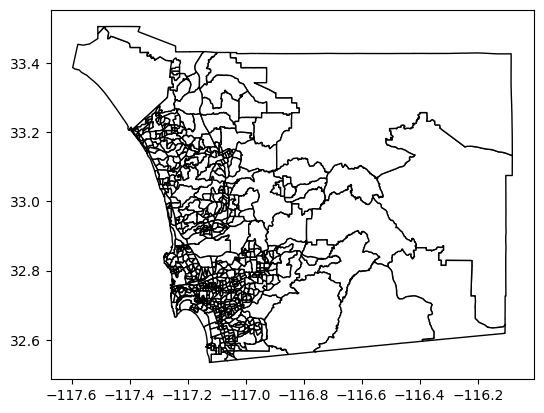

In [14]:
test1 = joined_tracts.groupby(['CT', 'cluster'])['GEOID'].max().reset_index()
new_dict = test1.set_index('CT')['cluster'].to_dict()

tracts['test'] = block_groups['CT'].map(new_dict)

new_tracts = tracts.dissolve(by='test').reset_index()
new_tracts.plot(color='white', edgecolor='black')

In [15]:
joined_tracts_new = df.sjoin_nearest(new_tracts)
joined_tracts_new

/Users/kelvinnguyen/anaconda3/envs/gpd/lib/python3.11/site-packages/geopandas/array.py:365: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


,APN,BCCCODE,OWNNAM1,OWNNAM2,OWNNAM3,CAREOF,STRNUM,STRFRA,STRDIR,STRNAM,STRTYP,STRSRM,CITY,STATE,CONTRY,ZIPCD1,ZIPCD2,LOCCOD,LOCNUM,LOCFRA,LOCDIR,LOCNAM,LOCTYP,LOCSRM,LOCCIT,BUSTYPE,SITE_ADDRE,POINT_X,POINT_Y,geometry,index_right,test,OBJECTID,GEOID,CT,Shape_Length,Shape_Area
0,1.010101e+09,131.0,PACIFIC MARINE CREDIT UNION,None,None,ATTN ACCOUNTING DEPT,1278.0,None,None,ROCKY POINT,DR,None,OCEANSIDE,CA,None,92056.0,0.0,None,525111.0,None,None,BASILONE,RD,000501,CAMP PENDLETON,CREDIT UNION EXEMPT,525111 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),44,50.0,599,6073019001,19001,333552.770299,1.779488e+09
1,1.010101e+09,291.0,HRB TAX GROUP INC,H&R BLOCK #6438,None,ATTN BUSINESS PP TAX #6438,1.0,None,None,H&R BLOCK,WAY,None,KANSAS CITY,MO,None,64105.0,0.0,None,0.0,None,None,CAMP PENDLETON,None,None,OCEANSIDE,ACCOUNTANT,0 CAMP PENDLETON,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),44,50.0,599,6073019001,19001,333552.770299,1.779488e+09
2,1.010101e+09,314.0,NORTH COUNTY PIZZA INC,DBA DOMINOS PIZZA #8357,None,None,0.0,None,None,PO BOX 4489,None,None,OCEANSIDE,CA,None,92052.0,0.0,None,520407.0,None,None,BASILONE,RD,None,CAMP PENDLETON,CAFE-FAST FOOD,520407 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),44,50.0,599,6073019001,19001,333552.770299,1.779488e+09
3,1.010101e+09,314.0,PIAZZA MANAGEMENT CORPORATION,OF SAN DIEGO,PIAZZA FAMILY RESTAURANTS INC,DBA MCDONALDS #34729,23113.0,None,None,PLAZA POINTE,DR,#100,LAGUNA HILLS,CA,None,92653.0,0.0,None,430314.0,None,None,BROWN,ST,None,CAMP PENDLETON,CAFE-FAST FOOD,430314 BROWN ST,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),44,50.0,599,6073019001,19001,333552.770299,1.779488e+09
4,1.010101e+09,404.0,BRIDGESTONE RETAIL,OPERATIONS LLC,DBA FIRESTONE COMPLT AUTO CARE,ATTN TAX DEPT,200.0,None,S,4TH,AVE,#100,NASHVILLE,TN,None,37201.0,0.0,None,51091.0,None,None,BASILONE,RD,None,CAMP PENDLETON,TIRES&GENERAL MERCH,51091 BASILONE RD,6.180956e+06,2.128315e+06,POINT (-117.49889 33.50132),44,50.0,599,6073019001,19001,333552.770299,1.779488e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89463,6.240801e+09,261.0,NICHOLAS PELLEGRINO,INVESTMENTS LP,None,None,215.0,None,W,LEXINGTON,AVE,None,EL CAJON,CA,None,92020.0,0.0,None,225.0,None,E,ORANGE,AVE,None,CHULA VISTA,APARTMENTS,225 E ORANGE AVE,6.317767e+06,1.800651e+06,POINT (-117.04195 32.60450),43,48.0,9,6073000700,700,11594.813707,8.396387e+06
89467,6.243930e+09,45.0,RELIGIOUS OF THE INCARNATE,WORD,None,None,153.0,None,None,RAINIER,CT,None,CHULA VISTA,CA,None,91911.0,0.0,None,153.0,None,None,RAINIER,CT,None,CHULA VISTA,RELIGIOUS ORGANIZATI,153 RAINIER CT,6.317300e+06,1.799967e+06,POINT (-117.04345 32.60261),43,48.0,9,6073000700,700,11594.813707,8.396387e+06
89468,6.244013e+09,261.0,ANGELINA TERRACE LP,None,None,C/O SUNRISE MGMT CO,7837.0,None,None,CONVOY,CT,None,SAN DIEGO,CA,None,92111.0,0.0,None,181.0,None,E,ORANGE,AVE,None,CHULA VISTA,APARTMENTS,181 E ORANGE AVE,6.317373e+06,1.800524e+06,POINT (-117.04323 32.60414),43,48.0,9,6073000700,700,11594.813707,8.396387e+06
97936,7.609008e+09,74.0,QCENTRIX LLC,None,None,None,1.0,None,N,FRANKLIN,None,#1800,CHICAGO,IL,None,60606.0,0.0,None,940.0,None,None,UNIVERSITY,AVE,000200,SAN DIEGO,DATA CENTER,940 UNIVERSITY AVE,6.283213e+06,1.853205e+06,POINT (-117.15563 32.74816),43,48.0,9,6073000700,700,11594.813707,8.396387e+06


In [16]:
new_industries = pd.read_csv('data/generate_labels.csv')

dict_industries = dict(zip(new_industries.Items, new_industries.Categories))

joined_tracts_new['Industry'] = joined_tracts_new['BUSTYPE'].map(dict_industries)

In [17]:
joined_tracts_new['Industry'].value_counts().index

Index(['Retail and Services', 'Construction and Manufacturing',
       'Professional and Financial', 'Health and Welfare'],
      dtype='object', name='Industry')

<Figure size 1200x600 with 0 Axes>

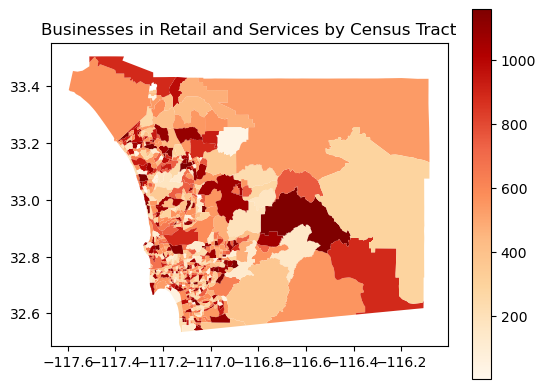

<Figure size 1200x600 with 0 Axes>

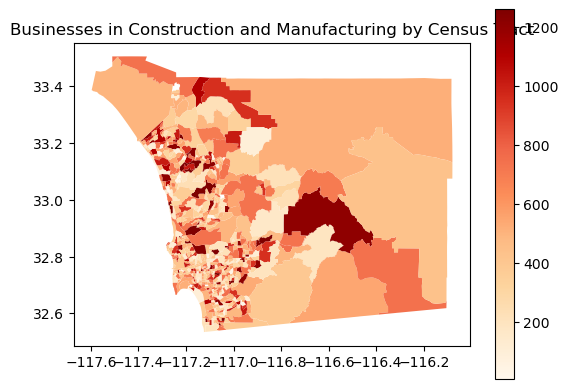

<Figure size 1200x600 with 0 Axes>

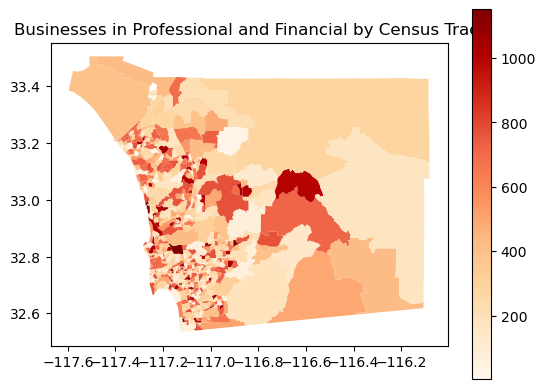

<Figure size 1200x600 with 0 Axes>

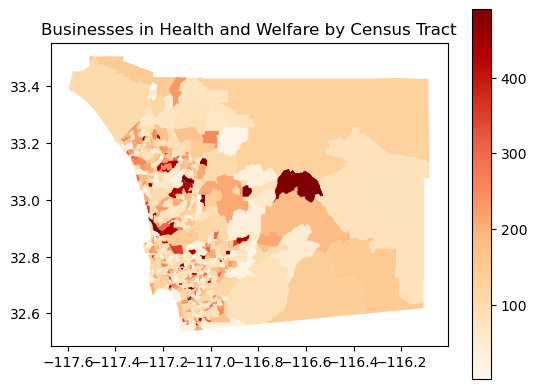

In [18]:
### For each of the 4 types of industries, graph how each looks in each the above graph

def plot_by_industry(census_tracts_data, businesses_data, industry):
    # Merge datasets based on a common key, e.g., 'census_tract_id'
    merged_data = pd.merge(census_tracts_data, businesses_data, how='left', on='CT')

    # Filter data for the specified industry
    industry_data = merged_data[merged_data['Industry'] == industry]

    # Group data by census tract and count the number of businesses
    grouped_data = gpd.GeoDataFrame(industry_data.groupby(['CT', 'geometry_x']).size().reset_index(name='business_count'))
    # display(grouped_data)
    grouped_data.set_geometry("geometry_x", inplace=True)
    grouped_data.to_crs('EPSG:4326', inplace=True)

    # Plot the data
    plt.figure(figsize=(12, 6))
    grouped_data.plot(column='business_count', legend=True,cmap='OrRd')
    # plt.bar(grouped_data['CT'], grouped_data['business_count'])
    # plt.xlabel('Census Tract ID')
    # plt.ylabel('Number of Businesses')
    plt.title(f'Businesses in {industry} by Census Tract')
    plt.show()

    return grouped_data

for i in joined_tracts_new['Industry'].value_counts().index:
    plot_by_industry(new_tracts, joined_tracts_new, i)


<Axes: >

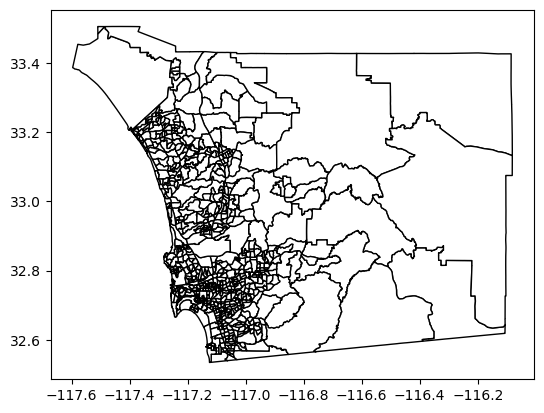

In [19]:
tracts.plot(color='white', edgecolor='black')

<Axes: >

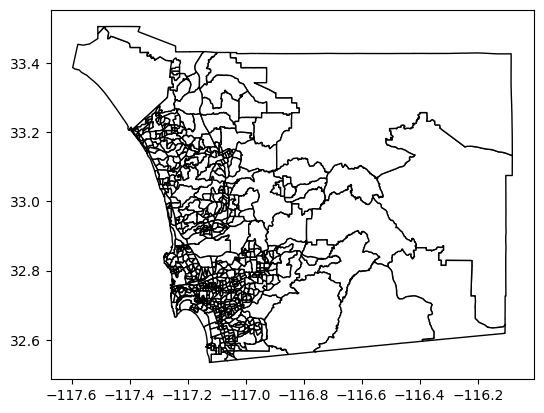

In [20]:
new_tracts.plot(color='white', edgecolor='black')

In [21]:
def plot_by_industry(census_tracts_data, businesses_data, industry):

    return grouped_data
    

for i in joined_tracts_new['Industry'].value_counts().index:
    plot_by_industry(new_tracts, joined_tracts_new, i)

NameError: name 'grouped_data' is not defined

In [ ]:
print(i)

Retail and Services


In [22]:
industry = 'Health and Welfare'

In [23]:
points

,point_x,point_y
0,-117.498891,33.501317
1,-117.498891,33.501317
2,-117.498891,33.501317
3,-117.498891,33.501317
4,-117.498891,33.501317
...,...,...
95648,-117.132925,32.631843
95649,-117.132925,32.631843
95650,-117.130477,32.627290
95659,-117.167646,32.684790


In [24]:
merged_data = pd.merge(new_tracts, joined_tracts_new, how='left', on='CT')

merged_data

,test_x,geometry_x,OBJECTID_x,GEOID_x,CT,Shape_Length_x,Shape_Area_x,APN,BCCCODE,OWNNAM1,OWNNAM2,OWNNAM3,CAREOF,STRNUM,STRFRA,STRDIR,STRNAM,STRTYP,STRSRM,CITY,STATE,CONTRY,ZIPCD1,ZIPCD2,LOCCOD,LOCNUM,LOCFRA,LOCDIR,LOCNAM,LOCTYP,LOCSRM,LOCCIT,BUSTYPE,SITE_ADDRE,POINT_X,POINT_Y,geometry_y,index_right,test_y,OBJECTID_y,GEOID_y,Shape_Length_y,Shape_Area_y,Industry
0,0.0,"MULTIPOLYGON (((-117.06666 32.66556, -117.0665...",64,6073003111,3111,25205.396020,1.547358e+07,2.291421e+09,261.0,M R NORTH PLACE LLC,None,None,None,7676.0,None,None,ENGINEER,RD,None,SAN DIEGO,CA,None,92025.0,0.0,None,460.0,None,E,MISSION,AVE,None,ESCONDIDO,APARTMENTS,460 E MISSION AVE,6.307437e+06,1.993000e+06,POINT (-117.08047 33.13292),0,0.0,64,6073003111,25205.396020,1.547358e+07,Construction and Manufacturing
1,0.0,"MULTIPOLYGON (((-117.06666 32.66556, -117.0665...",64,6073003111,3111,25205.396020,1.547358e+07,2.291422e+09,261.0,ESCONDIDO FAMILY HOUSING,PARTNERS LP,None,None,1507.0,None,W,YALE,AVE,None,ORANGE,CA,None,92867.0,0.0,None,508.0,None,E,MISSION,AVE,None,ESCONDIDO,APARTMENTS,508 E MISSION AVE,6.307623e+06,1.992972e+06,POINT (-117.07986 33.13284),0,0.0,64,6073003111,25205.396020,1.547358e+07,Construction and Manufacturing
2,0.0,"MULTIPOLYGON (((-117.06666 32.66556, -117.0665...",64,6073003111,3111,25205.396020,1.547358e+07,2.291601e+09,261.0,ROSS APARTMENT CO V LP,None,None,None,0.0,None,None,PO BOX 462810,None,None,ESCONDIDO,CA,None,92046.0,0.0,None,827.0,None,N,FIG,ST,None,ESCONDIDO,APARTMENTS,827 N FIG ST,6.307899e+06,1.993392e+06,POINT (-117.07897 33.13400),0,0.0,64,6073003111,25205.396020,1.547358e+07,Construction and Manufacturing
3,0.0,"MULTIPOLYGON (((-117.06666 32.66556, -117.0665...",64,6073003111,3111,25205.396020,1.547358e+07,2.291603e+09,261.0,ROSS APARTMENT CO I,SUMMERWOOD VILLAS,None,C/O GREEN HARVEST ENTERPRISES,0.0,None,None,PO BOX 462810,None,None,ESCONDIDO,CA,None,92046.0,0.0,None,560.0,None,None,MISSION,AVE,None,ESCONDIDO,APARTMENTS,560 MISSION AVE,6.307741e+06,1.993066e+06,POINT (-117.07948 33.13310),0,0.0,64,6073003111,25205.396020,1.547358e+07,Construction and Manufacturing
4,0.0,"MULTIPOLYGON (((-117.06666 32.66556, -117.0665...",64,6073003111,3111,25205.396020,1.547358e+07,2.291603e+09,261.0,MIUCCI CREDIT TRUST 02-02-14,None,None,C/O CARMELA ESANI,2726.0,None,None,GLENVIEW,WAY,None,ESCONDIDO,CA,None,92025.0,0.0,None,602.0,None,E,MISSION,AVE,None,ESCONDIDO,APARTMENTS,602 E MISSION AVE,6.307855e+06,1.993048e+06,POINT (-117.07910 33.13305),0,0.0,64,6073003111,25205.396020,1.547358e+07,Construction and Manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98157,69.0,"MULTIPOLYGON (((-117.12712 32.76144, -117.1270...",89,6073003602,3602,10830.271072,7.076417e+06,6.772201e+09,261.0,FENTON H G PROPERTY CO,DBA AQUATERA APARTMENT HOMES,None,C/O BEN DURWOOD,7577.0,None,None,MISSION VALLEY,RD,None,SAN DIEGO,CA,None,92108.0,0.0,None,5377.0,None,None,MISSION CENTER,RD,None,SAN DIEGO,APARTMENTS,5377 MISSION CENTER RD,6.283655e+06,1.861896e+06,POINT (-117.15444 32.77206),63,69.0,89,6073003602,10830.271072,7.076417e+06,Construction and Manufacturing
98158,69.0,"MULTIPOLYGON (((-117.12712 32.76144, -117.1270...",89,6073003602,3602,10830.271072,7.076417e+06,6.772201e+09,708.0,CEMEX PACIFIC HOLDINGS LLC,#4382,None,ATTN PROPERTY TAX DEPT,0.0,None,None,PO BOX 2883,None,None,WEST PALM BEACH,FL,None,33402.0,0.0,None,5745.0,None,None,MISSION CENTER,RD,None,SAN DIEGO,DIRT/SAND/GRAVEL,5745 MISSION CENTER RD,6.283655e+06,1.861896e+06,POINT (-117.15444 32.77206),63,69.0,89,6073003602,10830.271072,7.076417e+06,Construction and Manufacturing
98159,69.0,"MULTIPOLYGON (((-117.12712 32.76144, -117.1270...",89,6073003602,3602,10830.271072,7.076417e+06,7.602269e+09,123.0,AUTO REGISTRATION SERVICE INC,ARS,None,None,7385.0,None,None,BROADWAY,None,None,LEMON GROVE,CA,None,91945.0,0.0,None,7385.0,None,None,BROADWAY,None,None,L

In [62]:
# # Filter data for the specified industry
# industry_data = merged_data[merged_data['Industry'] == industry]
# industry_data
# gpd.GeoDataFrame(industry_data.groupby('geometry_x').count().reset_index()[['geometry_x','CT']]).set_geometry('geometry_x').explore()

<Figure size 1200x600 with 0 Axes>

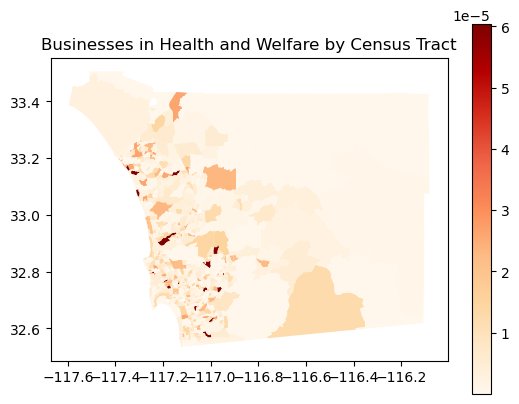

In [28]:

# Group data by census tract and count the number of businesses
grouped_data = gpd.GeoDataFrame(industry_data.groupby(['CT', 'geometry_x', 'Shape_Area_x']).size().reset_index(name='business_count'))
grouped_data['business_density'] = grouped_data['business_count'] / grouped_data['Shape_Area_x']
grouped_data.set_geometry("geometry_x", inplace=True)
grouped_data.to_crs('EPSG:4326', inplace=True)

# Plot the data
plt.figure(figsize=(12, 6))
grouped_data.plot(column='business_density', legend=True,cmap='OrRd')
# plt.bar(grouped_data['CT'], grouped_data['business_count'])
# plt.xlabel('Census Tract ID')
# plt.ylabel('Number of Businesses')
plt.title(f'Businesses in {industry} by Census Tract')
plt.show()

In [29]:
df['x'] = df['geometry'].x
df['y'] = df['geometry'].y

In [30]:
other_points = df[['x', 'y']].values
k = 70
kmeans = KMeans(n_clusters=k, n_init=1)
kmeans.fit(other_points)
df['cluster'] = kmeans.labels_

In [31]:

labels = pd.read_csv('data/generate_labels.csv')

In [32]:
thing

NameError: name 'thing' is not defined

,CT,geometry_y,cluster
0,100,"MULTIPOLYGON (((-117.18858 32.75915, -117.1884...",69
1,201,"MULTIPOLYGON (((-117.16962 32.75783, -117.1684...",69
2,202,"MULTIPOLYGON (((-117.17484 32.74988, -117.1743...",69
3,301,"MULTIPOLYGON (((-117.16667 32.74899, -117.1664...",69
4,302,"MULTIPOLYGON (((-117.15628 32.74840, -117.1560...",69


,cluster,geometry_y,CT
0,-1,"POLYGON ((-117.03736 32.79097, -117.03768 32.7...",137643
1,1,"POLYGON ((-117.21210 33.12618, -117.21202 33.1...",159422
2,2,"POLYGON ((-117.25416 32.75935, -117.25415 32.7...",127280
3,3,"POLYGON ((-116.66442 33.09852, -116.66429 33.0...",20904
4,4,"POLYGON ((-117.17728 32.67777, -117.17741 32.6...",207327


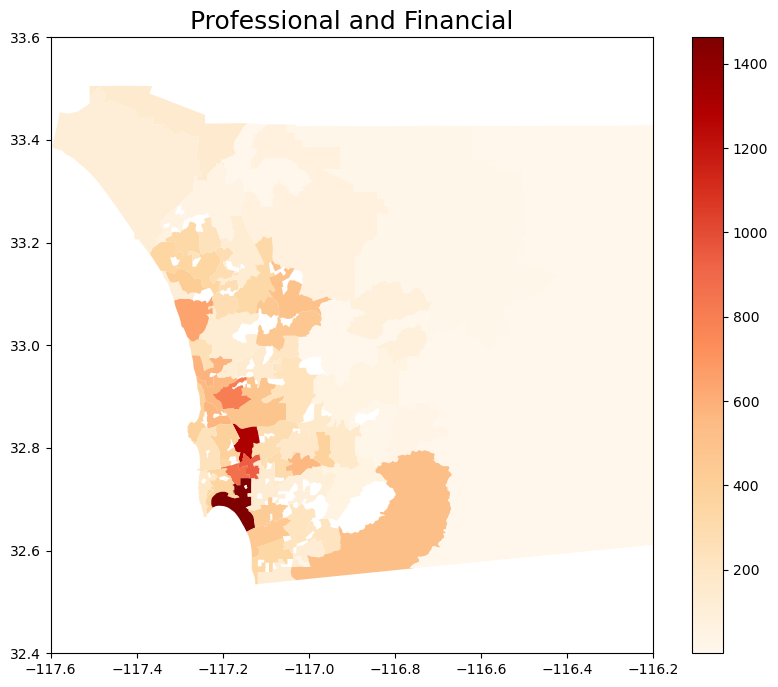

,CT,geometry_y,cluster
0,100,"MULTIPOLYGON (((-117.18858 32.75915, -117.1884...",17
1,201,"MULTIPOLYGON (((-117.16962 32.75783, -117.1684...",69
2,202,"MULTIPOLYGON (((-117.17484 32.74988, -117.1743...",69
3,301,"MULTIPOLYGON (((-117.16667 32.74899, -117.1664...",69
4,302,"MULTIPOLYGON (((-117.15628 32.74840, -117.1560...",69


,cluster,geometry_y,CT
0,-1,"POLYGON ((-117.00340 32.78643, -117.00342 32.7...",127936
1,1,"MULTIPOLYGON (((-117.21213 33.12618, -117.2121...",139391
2,2,"MULTIPOLYGON (((-117.25416 32.75935, -117.2541...",110571
3,3,"POLYGON ((-116.54756 33.06740, -116.54740 33.0...",41807
4,4,"MULTIPOLYGON (((-117.17728 32.67777, -117.1774...",202325


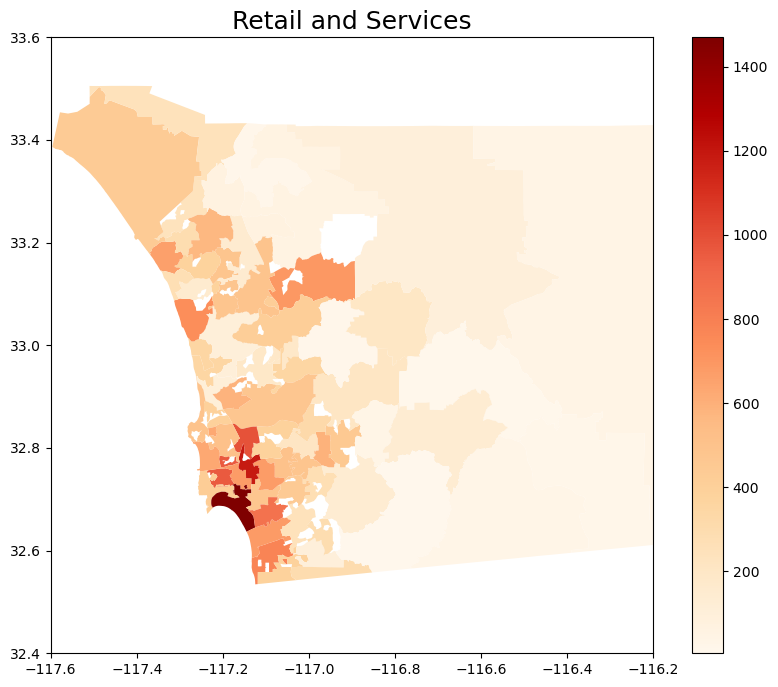

,CT,geometry_y,cluster
0,100,"MULTIPOLYGON (((-117.18858 32.75915, -117.1884...",17
1,201,"MULTIPOLYGON (((-117.16962 32.75783, -117.1684...",69
2,202,"MULTIPOLYGON (((-117.17484 32.74988, -117.1743...",69
3,301,"MULTIPOLYGON (((-117.16667 32.74899, -117.1664...",69
4,302,"MULTIPOLYGON (((-117.15628 32.74840, -117.1560...",69


,cluster,geometry_y,CT
0,-1,"POLYGON ((-116.98683 32.79418, -116.98680 32.7...",113353
1,1,"POLYGON ((-117.21210 33.12618, -117.21202 33.1...",179347
2,2,"POLYGON ((-117.25416 32.75935, -117.25415 32.7...",134982
3,3,"POLYGON ((-116.66442 33.09852, -116.66429 33.0...",20904
4,4,"POLYGON ((-117.17728 32.67777, -117.17741 32.6...",208827


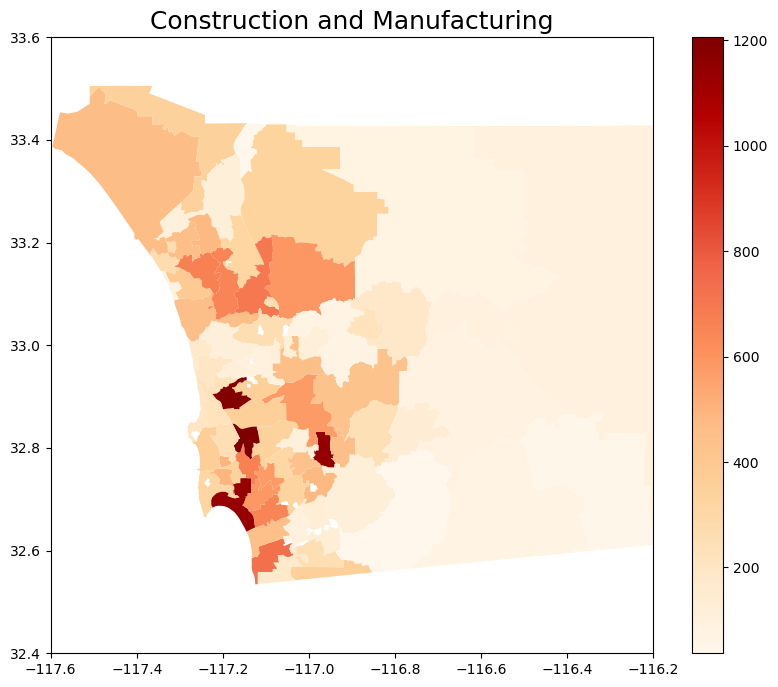

,CT,geometry_y,cluster
0,201,"MULTIPOLYGON (((-117.16962 32.75783, -117.1684...",69
1,202,"MULTIPOLYGON (((-117.17484 32.74988, -117.1743...",69
2,301,"MULTIPOLYGON (((-117.16667 32.74899, -117.1664...",69
3,302,"MULTIPOLYGON (((-117.15628 32.74840, -117.1560...",69
4,400,"MULTIPOLYGON (((-117.16157 32.75880, -117.1609...",69


,cluster,geometry_y,CT
0,-1,"POLYGON ((-116.98683 32.79418, -116.98680 32.7...",122641
1,1,"POLYGON ((-117.21210 33.12618, -117.21202 33.1...",159422
2,2,"MULTIPOLYGON (((-117.25416 32.75935, -117.2541...",95467
3,3,"POLYGON ((-116.66442 33.09852, -116.66429 33.0...",20904
4,4,"POLYGON ((-117.17728 32.67777, -117.17741 32.6...",197926


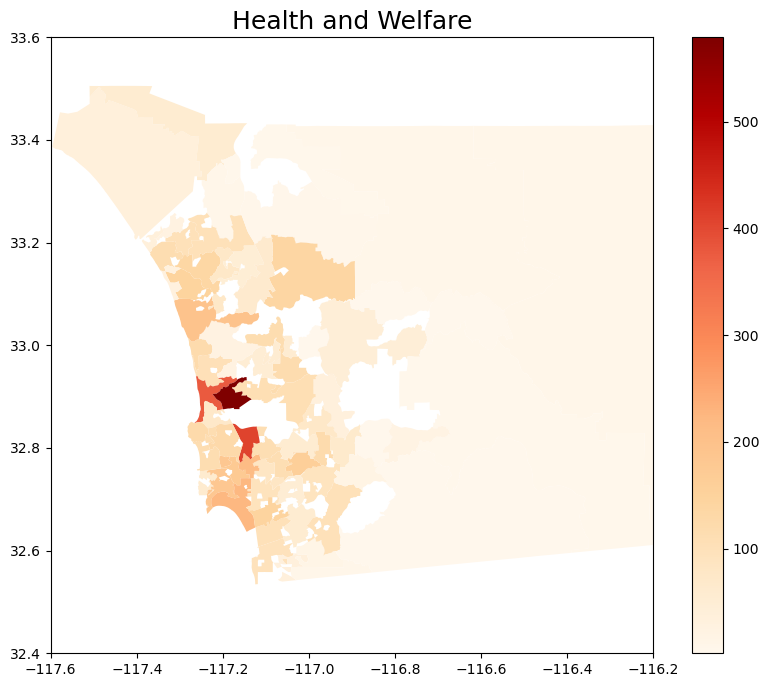

In [33]:
df = df.set_geometry('geometry')
tracts = tracts.set_geometry('geometry')

for i in labels['Categories'].unique():

    df2 = df.merge(labels, how='left', left_on='BUSTYPE',right_on='Items')[['geometry','Categories','cluster']]
    df2 = df2[df2['Categories']==i]

    pre_groupby = tracts.sjoin(df2, how='right', predicate='contains')
    geo = gpd.GeoDataFrame(pre_groupby.merge(tracts, on='CT').set_geometry('geometry_y')
                           .groupby(['CT','geometry_y'])['cluster']
                           .agg(lambda x:x.value_counts().index[0] if x.any() and x.value_counts().index[0]>0 else -1)
                           .to_frame()
                           .reset_index()).set_geometry('geometry_y')
    display(geo.head())

    shapes = geo.dissolve(by='cluster',aggfunc='sum').reset_index()
    display(shapes.head())
    total_tract = shapes.sjoin(df2,how='left',predicate='contains').groupby('geometry_y').count()
    geothing = gpd.GeoDataFrame(total_tract.reset_index()).set_geometry('geometry_y')
    fig, ax = plt.subplots(figsize=(10, 8))
    geothing.plot(ax=ax, column='CT', legend=True,cmap='OrRd').set_title(i)
    ax.set_title(i, fontsize=18)
    ax.set_xlim([-117.6, -116.2])
    ax.set_ylim([32.4, 33.6])
    plt.show()

In [50]:
shapes_counts = gpd.GeoDataFrame(shapes.sjoin(df2,how='left',predicate='contains').groupby('geometry_y').size().reset_index(), crs='EPSG:4326', geometry='geometry_y').rename(columns={0: 'count'})
shapes_counts



,geometry_y,count
0,"MULTIPOLYGON (((-117.24133 32.72938, -117.2412...",62
1,"MULTIPOLYGON (((-117.22047 32.72323, -117.2223...",183
2,"POLYGON ((-117.17078 32.73043, -117.17103 32.7...",177
3,"POLYGON ((-117.17728 32.67777, -117.17741 32.6...",223
4,"POLYGON ((-117.08452 32.61704, -117.08581 32.6...",100
...,...,...
63,"POLYGON ((-116.31816 32.85851, -116.32223 32.8...",6
64,"POLYGON ((-116.81334 32.85603, -116.81301 32.8...",3
65,"POLYGON ((-116.68758 32.84176, -116.68432 32.8...",22
66,"POLYGON ((-116.73695 32.79374, -116.73661 32.7...",4


In [ ]:
def geometries_to_tracts(groupby_tracts, min_per_tract=10):
    min_per_tract = 10
    clusters_tracts = groupby_tracts.agg(lambda x:x.value_counts().index[0] if x.any() and x.value_counts().index[0]>min_per_tract else -1).to_frame()
    clusters_tracts = clusters_tracts[clusters_tracts['cluster']!=-1].reset_index()
    clusters_tracts = clusters_tracts.set_geometry('the_geom')
    clusters_tracts = clusters_tracts.merge(groupby_tracts.count(),on='the_geom', how='left').rename(columns={'cluster_x':'cluster','cluster_y':'count'})

    return  clusters_tracts.dissolve(by='cluster',aggfunc='sum').reset_index()
dissolved = geometries_to_tracts(groupby_tracts)
dissolved.plot(column='count')

NameError: name 'groupby_tracts' is not defined

In [39]:
blocks = pd.read_csv("data/Census_Blocks_2020_20240309.csv", dtype={'GEOID20': str})
blocks['geometry'] = blocks['the_geom'].apply(wkt.loads)
blocks.drop(columns=['the_geom'], inplace=True)
blocks = gpd.GeoDataFrame(blocks, crs='EPSG:4326')
blocks

,OBJECTID,GEOID20,GEOID,CT,BLOCK,CTBLOCK,Shape_Length,Shape_Area,geometry
0,21466,060730191081004,6073019108,19108,1004,191081004,35038.333218,4.108837e+07,"MULTIPOLYGON (((-117.04770 33.38348, -117.0474..."
1,15047,060730162021040,6073016202,16202,1040,162021040,959.966234,4.193534e+04,"MULTIPOLYGON (((-116.96233 32.81333, -116.9622..."
2,27874,060730213063001,6073021306,21306,3001,213063001,1765.784928,1.247016e+05,"MULTIPOLYGON (((-116.89186 32.70980, -116.8918..."
3,23716,060730200431007,6073020043,20043,1007,200431007,12902.680303,3.802860e+06,"MULTIPOLYGON (((-117.18887 33.10766, -117.1888..."
4,24872,060730205001003,6073020500,20500,1003,205001003,3191.253616,6.231309e+05,"MULTIPOLYGON (((-117.09442 33.11167, -117.0944..."
...,...,...,...,...,...,...,...,...,...
28469,18602,060730177021013,6073017702,17702,1013,177021013,761.155044,3.136004e+04,"MULTIPOLYGON (((-117.29508 33.05839, -117.2950..."
28470,22068,060730193013007,6073019301,19301,3007,193013007,9316.826629,1.393697e+06,"MULTIPOLYGON (((-117.28148 33.23111, -117.2807..."
28471,8285,060730092013003,6073009201,9201,3003,92013003,2035.300499,1.933221e+05,"MULTIPOLYGON (((-117.14790 32.79295, -117.1478..."
28472,22421,060730196023000,6073019602,19602,3000,196023000,6019.405679,1.498224e+06,"MULTIPOLYGON (((-117.22713 33.19000, -117.2267..."


In [42]:
geo_sd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 15976 entries, 0 to 15975
Data columns (total 54 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   w_geocode   15976 non-null  object  
 1   C000        15976 non-null  int64   
 2   CA01        15976 non-null  int64   
 3   CA02        15976 non-null  int64   
 4   CA03        15976 non-null  int64   
 5   CE01        15976 non-null  int64   
 6   CE02        15976 non-null  int64   
 7   CE03        15976 non-null  int64   
 8   CNS01       15976 non-null  int64   
 9   CNS02       15976 non-null  int64   
 10  CNS03       15976 non-null  int64   
 11  CNS04       15976 non-null  int64   
 12  CNS05       15976 non-null  int64   
 13  CNS06       15976 non-null  int64   
 14  CNS07       15976 non-null  int64   
 15  CNS08       15976 non-null  int64   
 16  CNS09       15976 non-null  int64   
 17  CNS10       15976 non-null  int64   
 18  CNS11       15976 non-null  int64   
 

,w_geocode,C000,CA01,CA02,CA03,CE01,CE02,CE03,CNS01,CNS02,CNS03,CNS04,CNS05,CNS06,CNS07,CNS08,CNS09,CNS10,CNS11,CNS12,CNS13,CNS14,CNS15,CNS16,CNS17,CNS18,CNS19,CNS20,CR01,CR02,CR03,CR04,CR05,CR07,CT01,CT02,CD01,CD02,CD03,CD04,CS01,CS02,CFA01,CFA02,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,CFS04,CFS05,createdate,index_right,count
geometry,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"MULTIPOLYGON (((-117.25699 32.72098, -117.2569...",060730072003007,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,20231016,0,62
"MULTIPOLYGON (((-117.26257 32.95229, -117.2623...",060730172022040,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,20231016,29,121
"MULTIPOLYGON (((-116.94209 32.76193, -116.9411...",060730136051016,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,20231016,11,90
"MULTIPOLYGON (((-117.26217 32.95124, -117.2619...",060730172022043,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,20231016,29,121
"MULTIPOLYGON (((-117.26054 32.95438, -117.2600...",060730172022033,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,20231016,29,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"MULTIPOLYGON (((-117.16685 32.75841, -117.1659...",060730004002000,9995,2256,6017,1722,1352,1631,7012,0,0,0,0,0,0,59,0,0,17,1,10,2,68,0,9820,0,0,18,0,6500,647,97,2312,42,397,7538,2457,990,1347,2136,3266,4116,5879,0,0,0,0,0,0,0,0,0,0,20231016,2,177
"MULTIPOLYGON (((-117.16386 32.71883, -117.1636...",060730053021009,12455,1468,8092,2895,634,808,11013,0,0,0,397,6,5,8,13,591,0,7,45,44,0,42,2,26,82,2,11185,8889,1447,139,1321,122,537,8554,3901,1479,2196,3853,3459,8174,4281,0,0,0,0,0,0,0,0,0,0,20231016,3,223
"MULTIPOLYGON (((-117.22765 32.88706, -117.2275...",060730083391034,14041,2154,9104,2783,361,1011,12669,289,0,0,48,1260,160,234,0,383,2188,339,5058,2678,190,177,1019,0,3,14,1,9453,741,84,3162,70,531,11487,2554,1231,1883,3226,5547,7562,6479,0,0,0,0,0,0,0,0,0,0,20231016,31,378


<Axes: >

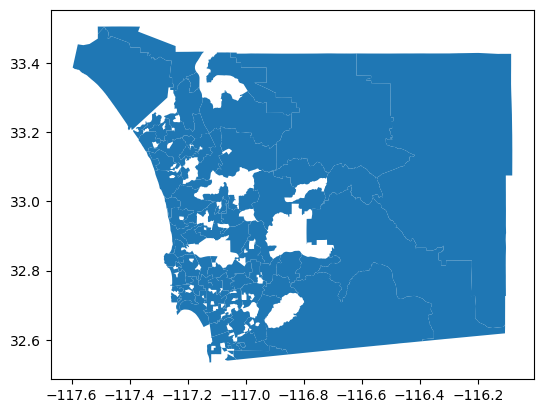

In [55]:
shapes_counts.plot()